In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
game=pd.read_csv("games.csv")
players=pd.read_csv("players.csv")
player_play=pd.read_csv("player_play.csv")
plays=pd.read_csv("plays.csv")


In [3]:
game

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/6/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/6/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/6/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/6/2022,20:20:00,KC,TEN,20,17


In [4]:
game.describe()

,gameId,season,week,homeFinalScore,visitorFinalScore
count,1.360000e+02,136.0,136.000000,136.000000,136.000000
mean,2.022099e+09,2022.0,4.845588,22.669118,20.948529
std,5.996614e+03,0.0,2.567254,8.659874,9.731446
min,2.022091e+09,2022.0,1.000000,3.000000,0.000000
25%,2.022093e+09,2022.0,3.000000,17.000000,14.750000
50%,2.022101e+09,2022.0,5.000000,22.500000,20.000000
75%,2.022102e+09,2022.0,7.000000,27.000000,27.000000
max,2.022111e+09,2022.0,9.000000,49.000000,48.000000


In [5]:
game_date = game.groupby("gameDate").agg(
    home_score_count=('homeFinalScore', 'count'),
    visitor_score_count=('visitorFinalScore', 'count')
).reset_index()

In [6]:
game_date

,gameDate,home_score_count,visitor_score_count
0,10/10/2022,1,1
1,10/13/2022,1,1
2,10/16/2022,12,12
3,10/17/2022,1,1
4,10/2/2022,14,14
5,10/20/2022,1,1
6,10/23/2022,12,12
7,10/24/2022,1,1
8,10/27/2022,1,1
9,10/3/2022,1,1


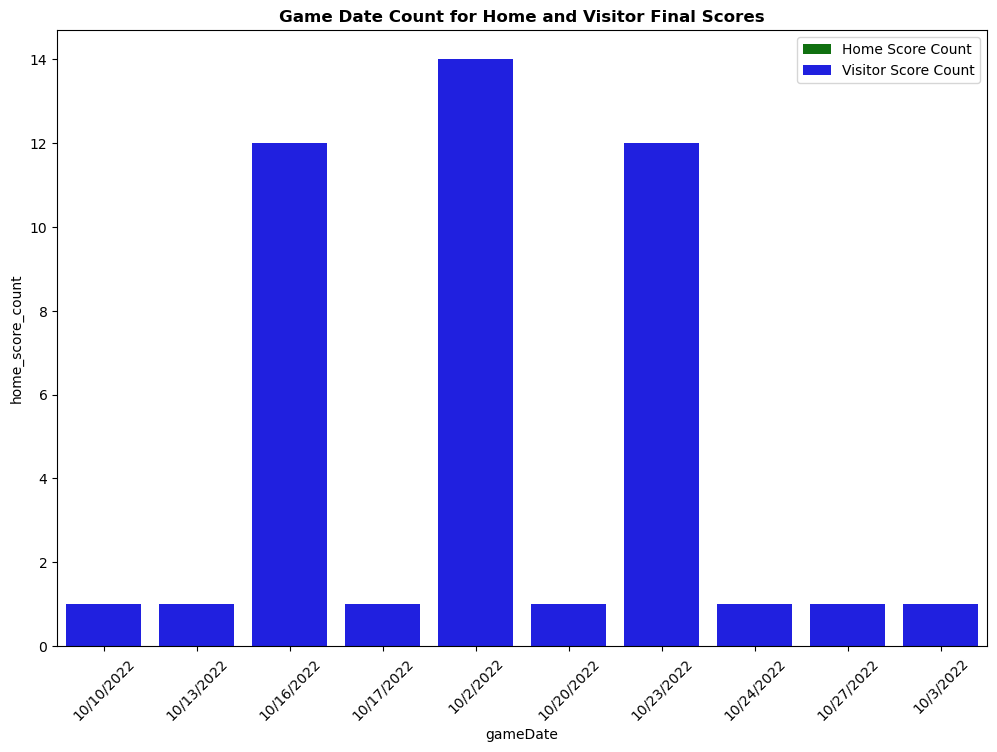

In [7]:
plt.figure(figsize=(12,8))
sns.barplot(data=game_date.head(10).reset_index(),x="gameDate", y="home_score_count", color="green", label="Home Score Count")
sns.barplot(data=game_date.head(10).reset_index(),x="gameDate", y="visitor_score_count", color="blue", label="Visitor Score Count")
plt.title("Game Date Count for Home and Visitor Final Scores", fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [8]:
ga=pd.DataFrame(game.groupby("homeTeamAbbr")["homeFinalScore"].mean()).sort_values(by="homeFinalScore",ascending=False)

In [9]:
ga

,homeFinalScore
homeTeamAbbr,
BUF,35.333333
DET,31.600000
LV,31.000000
CIN,31.000000
MIN,28.500000
PHI,28.500000
CLE,26.800000
ATL,26.200000
BAL,25.000000


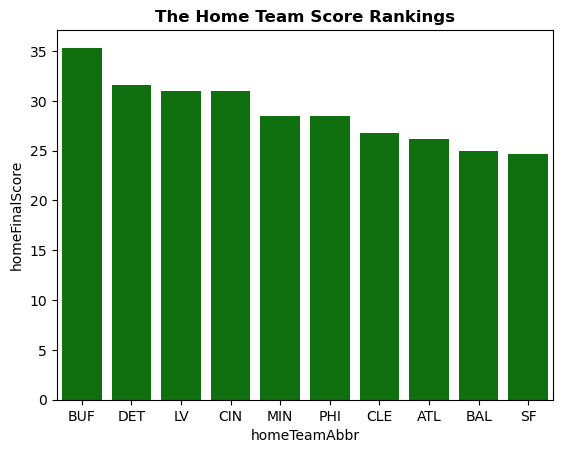

In [10]:
sns.barplot(data=ga.head(10),x="homeTeamAbbr",y="homeFinalScore",color="green")
plt.title("The Home Team Score Rankings",fontweight='bold')
plt.show()

In [11]:
visitor_score=pd.DataFrame(game.groupby("visitorTeamAbbr")["visitorFinalScore"].mean()).sort_values(by="visitorFinalScore",ascending=False)

In [12]:
visitor_score

,visitorFinalScore
visitorTeamAbbr,
KC,36.500000
SEA,31.000000
MIA,28.000000
PHI,27.750000
BAL,27.000000
LAC,27.000000
JAX,27.000000
NO,25.000000
NYJ,24.500000


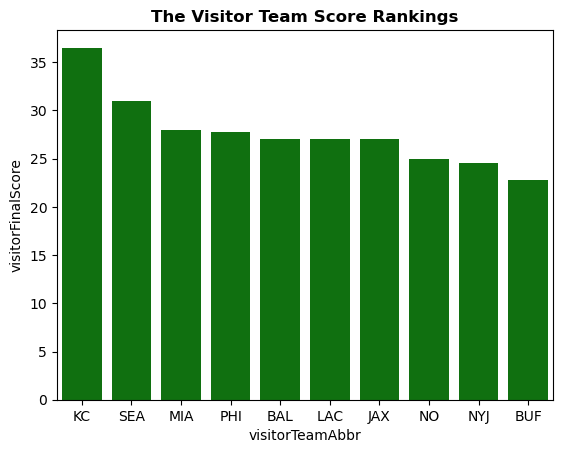

In [13]:
sns.barplot(data=visitor_score.head(10),x="visitorTeamAbbr",y="visitorFinalScore",color="green")
plt.title("The Visitor Team Score Rankings",fontweight='bold')
plt.show()

In [14]:
colors={'homeTeamAbbr':'Green','visitorTeamAbbr': 'White'}
sns.set(style="whitegrid")

In [15]:
players

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
...,...,...,...,...,...,...,...
1692,55190,6-1,285,NaN,Maryland,DE,Sam Okuayinonu
1693,55200,6-6,266,NaN,Indiana,DT,Ryder Anderson
1694,55239,6-2,300,NaN,Pennsylvania,DT,Prince Emili
1695,55240,6-1,185,NaN,Buffalo,CB,Ja'Marcus Ingram


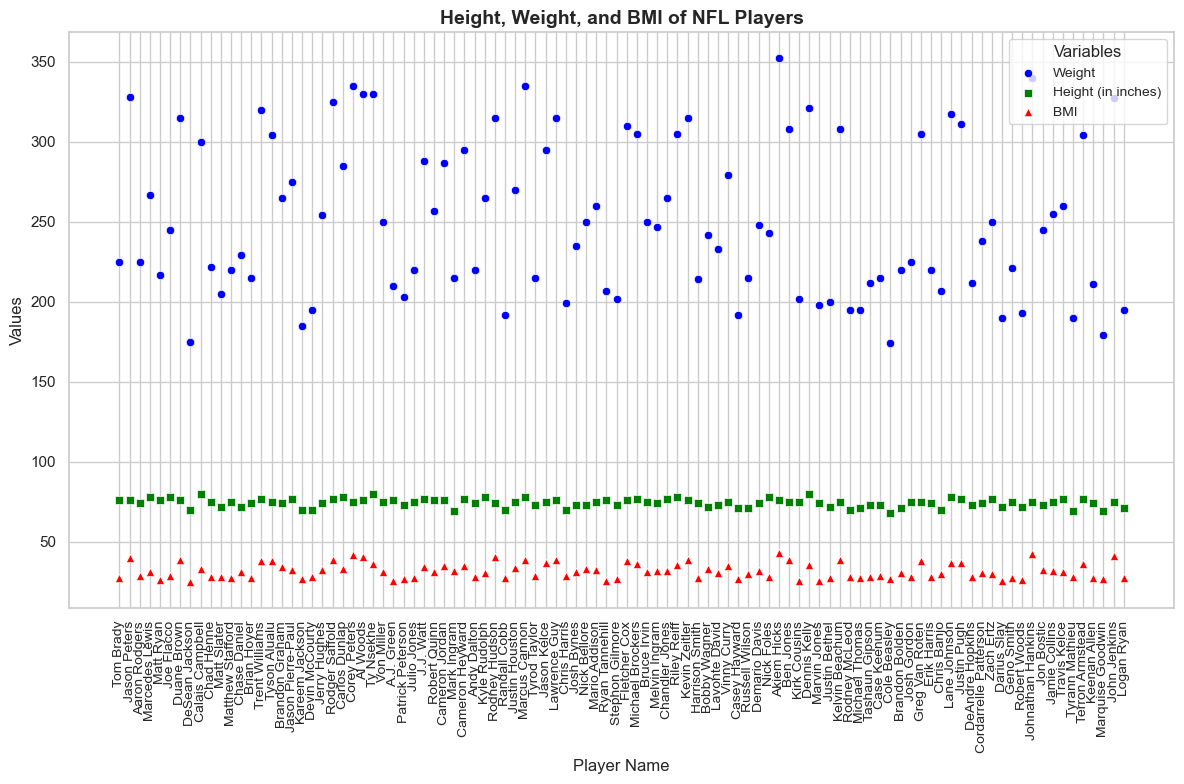

In [16]:
def height_to_inches(height_str):
    feet, inches = map(int, height_str.split('-'))
    return feet * 12 + inches

players['height_in_inches'] = players['height'].apply(height_to_inches)


players['BMI'] = (players['weight'] * 703) / (players['height_in_inches'] ** 2)

grouped=pd.DataFrame(players.groupby("displayName").agg(height=('height_in_inches','count'),weight=('weight','count'),BMI=('BMI','count'))).reset_index()

def plot_height_vs_weight_with_bmi(players):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=players.head(100), x='displayName', y='weight', marker='o', color='blue', label='Weight')
    sns.scatterplot(data=players.head(100), x='displayName', y='height_in_inches', marker='s', color='green', label='Height (in inches)')
    sns.scatterplot(data=players.head(100), x='displayName', y='BMI', marker='^', color='red', label='BMI')

    plt.title('Height, Weight, and BMI of NFL Players', fontsize=14, fontweight='bold')
    plt.xticks(rotation=90, fontsize=10)
    plt.xlabel('Player Name', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.legend(title='Variables', loc='upper right', fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_height_vs_weight_with_bmi(players)

bmi=players[['displayName', 'height', 'height_in_inches', 'weight', 'BMI']]

In [17]:
bmi.describe()

,height_in_inches,weight,BMI
count,1697.000000,1697.000000,1697.000000
mean,74.255745,245.774308,31.149122
std,2.647646,47.256005,4.669968
min,66.000000,153.000000,21.766748
25%,72.000000,205.000000,27.365917
50%,75.000000,236.000000,30.042735
75%,76.000000,291.000000,34.868800
max,81.000000,380.000000,47.366578


In [18]:
def plot_height_vs_weight(data):
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='height', y='weight', data=data)
    plt.title('Height vs Weight of NFL Players', fontsize=14, fontweight='bold')
    plt.xlabel('Height (in feet)', fontsize=12)
    plt.ylabel('Weight (in pounds)', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def plot_position_height_distribution(data):
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='position', y='height', data=data)
    plt.title('Height Distribution by Position', fontsize=14, fontweight='bold')
    plt.xlabel('Position', fontsize=12)
    plt.ylabel('Height (in feet)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_top_colleges_by_player_count(data):
    
    plt.figure(figsize=(12, 6))
    top_colleges = data['collegeName'].value_counts().nlargest(10)
    sns.barplot(x=top_colleges.index, y=top_colleges.values)
    plt.title('Top 10 Colleges by Number of NFL Players', fontsize=14, fontweight='bold')
    plt.xlabel('College', fontsize=12)
    plt.ylabel('Number of Players', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

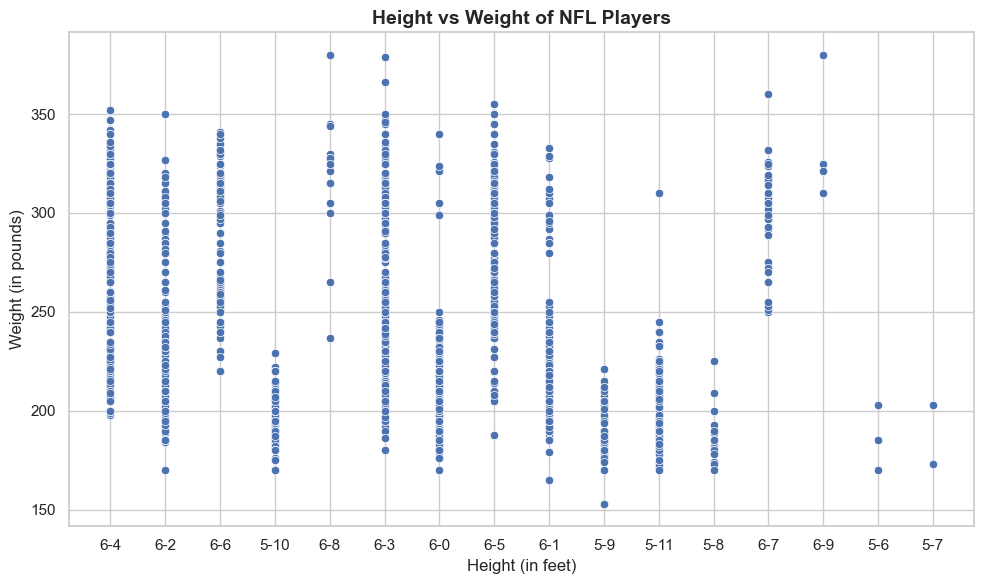

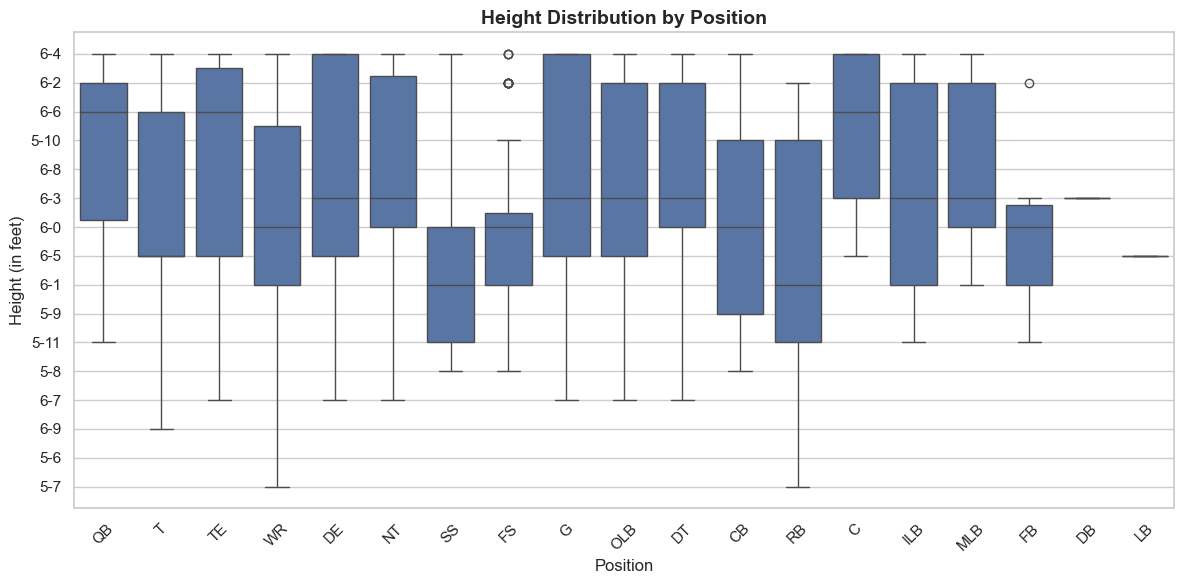

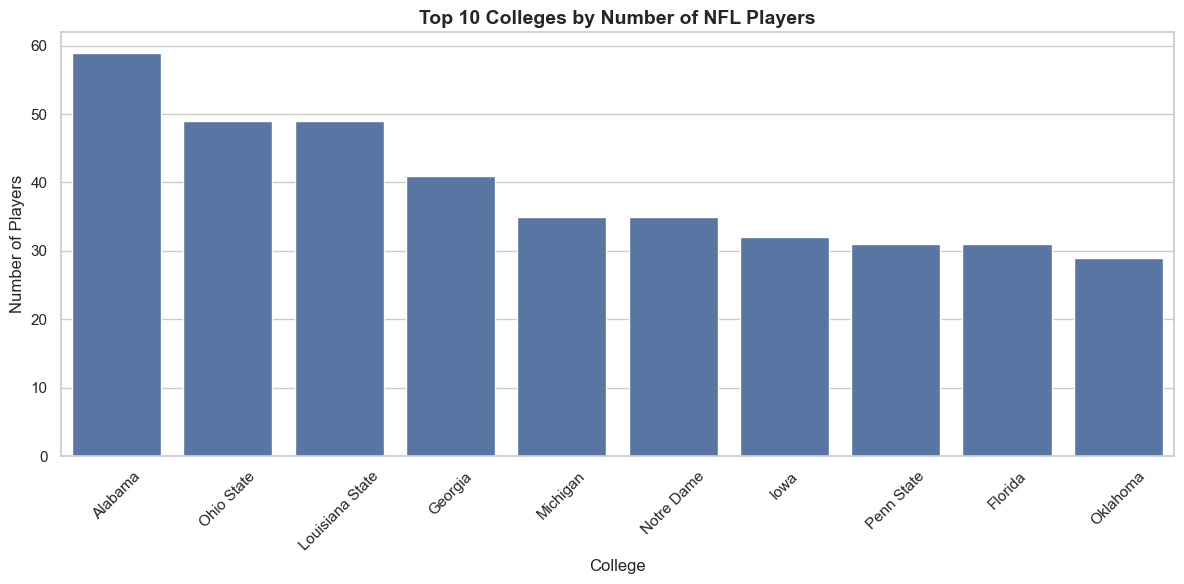

In [19]:
if __name__== "__main__":
 plot_height_vs_weight(players)
 plot_position_height_distribution(players)
 plot_top_colleges_by_player_count(players)   

In [20]:
game

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,9/8/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,9/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,9/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,9/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,9/11/2022,13:00:00,CIN,PIT,20,23
...,...,...,...,...,...,...,...,...,...
131,2022110607,2022,9,11/6/2022,13:00:00,WAS,MIN,17,20
132,2022110608,2022,9,11/6/2022,16:05:00,ARI,SEA,21,31
133,2022110609,2022,9,11/6/2022,16:25:00,TB,LA,16,13
134,2022110610,2022,9,11/6/2022,20:20:00,KC,TEN,20,17


In [21]:
player_play.columns

Index(['gameId', 'playId', 'nflId', 'teamAbbr', 'hadRushAttempt',
       'rushingYards', 'hadDropback', 'passingYards', 'sackYardsAsOffense',
       'hadPassReception', 'receivingYards', 'wasTargettedReceiver',
       'yardageGainedAfterTheCatch', 'fumbles', 'fumbleLost',
       'fumbleOutOfBounds', 'assistedTackle', 'forcedFumbleAsDefense',
       'halfSackYardsAsDefense', 'passDefensed', 'quarterbackHit',
       'sackYardsAsDefense', 'safetyAsDefense', 'soloTackle', 'tackleAssist',
       'tackleForALoss', 'tackleForALossYardage', 'hadInterception',
       'interceptionYards', 'fumbleRecoveries', 'fumbleRecoveryYards',
       'penaltyYards', 'penaltyNames', 'wasInitialPassRusher',
       'causedPressure', 'timeToPressureAsPassRusher',
       'getOffTimeAsPassRusher', 'inMotionAtBallSnap', 'shiftSinceLineset',
       'motionSinceLineset', 'wasRunningRoute', 'routeRan',
       'blockedPlayerNFLId1', 'blockedPlayerNFLId2', 'blockedPlayerNFLId3',
       'pressureAllowedAsBlocker', 'timeT

In [22]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,...,0,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,...,0,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,...,10,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,...,0,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone


In [23]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'gameClock', 'preSnapHomeScore', 'preSnapVisitorScore',
       'playNullifiedByPenalty', 'absoluteYardlineNumber',
       'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playClockAtSnap', 'passResult', 'passLength', 'targetX', 'targetY',
       'playAction', 'dropbackType', 'dropbackDistance', 'passLocationType',
       'timeToThrow', 'timeInTackleBox', 'timeToSack', 'passTippedAtLine',
       'unblockedPressure', 'qbSpike', 'qbKneel', 'qbSneak',
       'rushLocationType', 'penaltyYards', 'prePenaltyYardsGained',
       'yardsGained', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPointsAdded', 'isDropback',
       'pff_runConceptPrimary', 'pff_runConceptSecondary', 'pff_runPassOption',
       'pff_pass

In [24]:
plays['dropbackType'].unique()

array(['TRADITIONAL', 'DESIGNED_RUN', nan, 'SCRAMBLE',
       'SCRAMBLE_ROLLOUT_LEFT', 'DESIGNED_ROLLOUT_RIGHT',
       'DESIGNED_ROLLOUT_LEFT', 'QB_SNEAK', 'UNKNOWN',
       'SCRAMBLE_ROLLOUT_RIGHT'], dtype=object)

In [25]:
team_dropback_counts =pd.DataFrame(plays.groupby(['possessionTeam', 'dropbackType']).size().reset_index(name='count'))
team_dropback_counts


,possessionTeam,dropbackType,count
0,ARI,DESIGNED_ROLLOUT_LEFT,1
1,ARI,DESIGNED_ROLLOUT_RIGHT,6
2,ARI,DESIGNED_RUN,21
3,ARI,SCRAMBLE,50
4,ARI,SCRAMBLE_ROLLOUT_LEFT,1
...,...,...,...
250,WAS,QB_SNEAK,2
251,WAS,SCRAMBLE,32
252,WAS,SCRAMBLE_ROLLOUT_RIGHT,1
253,WAS,TRADITIONAL,308


In [26]:
plays['pff_passCoverage'].unique()

array(['Cover-3', 'Quarters', 'Cover-1', 'Cover 6-Left', 'Cover-2', nan,
       'Cover-0', 'Cover-3 Seam', 'Cover-6 Right', 'Goal Line',
       'Red Zone', '2-Man', 'Cover-3 Double Cloud', 'Bracket',
       'Miscellaneous', 'Cover-3 Cloud Left', 'Prevent', 'Cover-1 Double',
       'Cover-3 Cloud Right'], dtype=object)

In [27]:
plays['pff_manZone'].unique()

array(['Zone', 'Man', nan, 'Other'], dtype=object)

In [28]:
plays['pff_runConceptPrimary'].unique()

array([nan, 'MAN', 'INSIDE ZONE', 'UNDEFINED', 'PULL LEAD',
       'OUTSIDE ZONE', 'TRAP', 'SNEAK', 'POWER', 'COUNTER', 'DRAW',
       'TRICK', 'FB RUN'], dtype=object)

In [29]:
 plays['pff_runConceptSecondary'].unique()

array([nan, 'READ OPTION', 'LEAD', 'PITCH', 'INVERTED;READ OPTION',
       'SPLIT', 'MISDIRECTION', 'READ OPTION;SPLIT', 'LEAD;PITCH',
       'CROSS LEAD;LEAD', 'CROSS LEAD', 'LEAD;SPLIT', 'PITCH;SPLIT',
       'READ OPTION;SPEED OPTION', 'LEAD;READ OPTION;SPLIT',
       'LEAD;QB RUNS', 'QB RUNS', 'LEAD;READ OPTION',
       'CROSS LEAD;READ OPTION', 'CROSS LEAD;QB RUNS',
       'MISDIRECTION;PITCH', 'LEAD;SPEED OPTION',
       'READ OPTION;SPEED OPTION;SPLIT', 'INVERTED;READ OPTION;SPLIT',
       'SPEED OPTION', 'BACKSIDE FOLD',
       'INVERTED;READ OPTION;SPEED OPTION',
       'CROSS LEAD;READ OPTION;SPLIT', 'CROSS LEAD;LEAD;READ OPTION',
       'CROSS LEAD;INVERTED;READ OPTION', 'CROSS LEAD;SPLIT',
       'CROSS LEAD;PITCH', 'CROSS LEAD;MISDIRECTION',
       'MISDIRECTION;SPLIT', 'CROSS LEAD;READ OPTION;SPEED OPTION',
       'LEAD;MISDIRECTION', 'QB RUNS;SPLIT', 'MISDIRECTION;QB RUNS',
       'LEAD;READ OPTION;SPEED OPTION', 'LEAD;PITCH;SPLIT',
       'CROSS LEAD;LEAD;QB RUNS', 'BAC

In [30]:

defensive_success = plays.groupby('pff_passCoverage').agg(
    avg_yards_gained=('yardsGained', 'mean'),
    avg_epa=('expectedPointsAdded', 'mean')
).reset_index()


defensive_success.sort_values(by=['avg_yards_gained', 'avg_epa'], ascending=[True, True], inplace=True)

print(defensive_success)
     

        pff_passCoverage  avg_yards_gained   avg_epa
13             Goal Line          1.595890  0.061915
14         Miscellaneous          1.857143 -0.518478
17              Red Zone          2.497207 -0.017039
3                Cover-0          3.019835 -0.172026
15               Prevent          5.347826 -0.288837
8     Cover-3 Cloud Left          5.366667 -0.069200
16              Quarters          5.573082 -0.065997
7                Cover-3          5.623890 -0.044210
4                Cover-1          5.781818  0.005370
2           Cover 6-Left          5.829480  0.011773
6                Cover-2          6.039417 -0.036283
11          Cover-3 Seam          6.058176 -0.036949
12         Cover-6 Right          6.300000  0.025447
5         Cover-1 Double          6.388889  0.420516
0                  2-Man          6.682796  0.073656
9    Cover-3 Cloud Right          6.903226  0.050519
1                Bracket          7.053333  0.268159
10  Cover-3 Double Cloud         14.222222  0.

In [31]:
offensive_success = plays.groupby('pff_runConceptPrimary').agg(
    avg_yards_gained=('yardsGained', 'mean'),
    avg_epa=('expectedPointsAdded', 'mean')
).reset_index()

offensive_success.sort_values(by=['avg_yards_gained', 'avg_epa'], ascending=[False, False], inplace=True)

print(offensive_success)


   pff_runConceptPrimary  avg_yards_gained   avg_epa
10                 TRICK          6.482213  0.118663
9                   TRAP          6.366972  0.148438
11             UNDEFINED          5.894855  0.059095
6                  POWER          5.869231  0.042499
1                   DRAW          5.701493  0.047045
5           OUTSIDE ZONE          5.164898 -0.073730
0                COUNTER          5.144708 -0.048182
7              PULL LEAD          4.862816 -0.045170
3            INSIDE ZONE          4.795941 -0.034371
4                    MAN          4.543712 -0.036258
2                 FB RUN          2.769231  0.160613
8                  SNEAK          2.058333  0.545625


In [32]:
combined_success = plays.groupby(['pff_passCoverage', 'pff_runConceptPrimary']).agg(
    avg_yards_gained=('yardsGained', 'mean'),
    avg_epa=('expectedPointsAdded', 'mean')
).reset_index()

print(combined_success)


    pff_passCoverage pff_runConceptPrimary  avg_yards_gained   avg_epa
0              2-Man                  DRAW          8.200000  0.158185
1              2-Man           INSIDE ZONE          0.000000 -0.639670
2              2-Man                   MAN          0.000000 -0.679526
3              2-Man          OUTSIDE ZONE          6.571429  0.464860
4              2-Man                 POWER          0.000000 -0.706920
..               ...                   ...               ...       ...
139         Red Zone             PULL LEAD          3.888889  0.593702
140         Red Zone                 SNEAK          1.666667  1.154285
141         Red Zone                  TRAP          0.500000 -0.612523
142         Red Zone                 TRICK          3.117647  0.610971
143         Red Zone             UNDEFINED          1.266667 -0.107574

[144 rows x 4 columns]


In [101]:

plays.dropna(subset=['dropbackType'], inplace=True)


In [105]:
sum=plays.isnull()
sum.sum()

gameId                                  0
playId                                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          134
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
playNullifiedByPenalty                  0
absoluteYardlineNumber                  0
preSnapHomeTeamWinProbability           0
preSnapVisitorTeamWinProbability        0
expectedPoints                          0
offenseFormation                       83
receiverAlignment                      83
playClockAtSnap                         1
passResult                            598
passLength                           1606
targetX                           

In [107]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier


In [109]:
encoder=OneHotEncoder()
Features=plays[["possessionTeam","defensiveTeam"]]
Features=encoder.fit_transform(Features)
label=plays['dropbackType']
print(Features)

  (0, 6)	1.0
  (0, 33)	1.0
  (1, 6)	1.0
  (1, 40)	1.0
  (2, 12)	1.0
  (2, 62)	1.0
  (3, 15)	1.0
  (3, 62)	1.0
  (4, 2)	1.0
  (4, 61)	1.0
  (5, 25)	1.0
  (5, 42)	1.0
  (6, 8)	1.0
  (6, 63)	1.0
  (7, 8)	1.0
  (7, 48)	1.0
  (8, 11)	1.0
  (8, 52)	1.0
  (9, 11)	1.0
  (9, 42)	1.0
  (10, 1)	1.0
  (10, 59)	1.0
  (11, 6)	1.0
  (11, 34)	1.0
  (12, 12)	1.0
  :	:
  (10308, 60)	1.0
  (10309, 13)	1.0
  (10309, 63)	1.0
  (10310, 31)	1.0
  (10310, 45)	1.0
  (10311, 23)	1.0
  (10311, 34)	1.0
  (10312, 10)	1.0
  (10312, 40)	1.0
  (10313, 17)	1.0
  (10313, 33)	1.0
  (10314, 19)	1.0
  (10314, 52)	1.0
  (10315, 31)	1.0
  (10315, 46)	1.0
  (10316, 26)	1.0
  (10316, 35)	1.0
  (10317, 14)	1.0
  (10317, 50)	1.0
  (10318, 20)	1.0
  (10318, 32)	1.0
  (10319, 15)	1.0
  (10319, 45)	1.0
  (10320, 8)	1.0
  (10320, 38)	1.0


In [111]:
X_train,X_test,y_train,y_test=train_test_split(Features,label,random_state=2)

In [113]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [115]:
accuracy_score(y_pred,y_test)

0.7845796203022084